In [70]:
# basic
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_info_columns', 500)


# visualization
import matplotlib.pyplot as plt
import seaborn as sns   

# preprocessing and modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [2]:
data_folder = r"/home/topias/DS/Intro-to-ML/Project/Data"

file_list = os.listdir(data_folder)


for file_name in file_list:
    print(file_name)

sample_submission = pd.read_csv(data_folder + "/sample_submission.csv")
train = pd.read_csv(data_folder + "/train.csv")

print("Shape of the training data:")
print(train.shape)

test = pd.read_csv(data_folder + "/test.csv")

train.csv
sample_submission.csv
test.csv
Shape of the training data:
(27147, 27)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27147 entries, 0 to 27146
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            27147 non-null  int64  
 1   MW                            27147 non-null  float64
 2   NumOfAtoms                    27147 non-null  int64  
 3   NumOfC                        27147 non-null  int64  
 4   NumOfO                        27147 non-null  int64  
 5   NumOfN                        27147 non-null  int64  
 6   NumHBondDonors                27147 non-null  int64  
 7   NumOfConf                     27147 non-null  int64  
 8   NumOfConfUsed                 27147 non-null  int64  
 9   parentspecies                 26941 non-null  object 
 10  C.C..non.aromatic.            27147 non-null  int64  
 11  C.C.C.O.in.non.aromatic.ring  27147 non-null  int64  
 12  hydroxyl..alkyl.              27147 non-null  int64  
 13  a

In [5]:
#print(train.describe())
print('')
print(train.head())
print('')
#print(train.columns)

missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])


   Id          MW  NumOfAtoms  NumOfC  NumOfO  NumOfN  NumHBondDonors  \
0   0   30.010565           4       1       1       0               0   
1   1   74.995643           6       1       3       1               0   
2   2  102.990558           8       2       4       1               0   
3   3  118.985472           9       2       5       1               1   
4   4  134.980387          10       2       6       1               1   

   NumOfConf  NumOfConfUsed        parentspecies  ...  ether..alicyclic.  \
0          1              1  apin_decane_toluene  ...                  0   
1          1              1              toluene  ...                  0   
2          2              2              toluene  ...                  0   
3          3              1              toluene  ...                  0   
4          3              3              toluene  ...                  0   

   nitrate  nitro  aromatic.hydroxyl  carbonylperoxynitrate  peroxide  \
0        0      0             

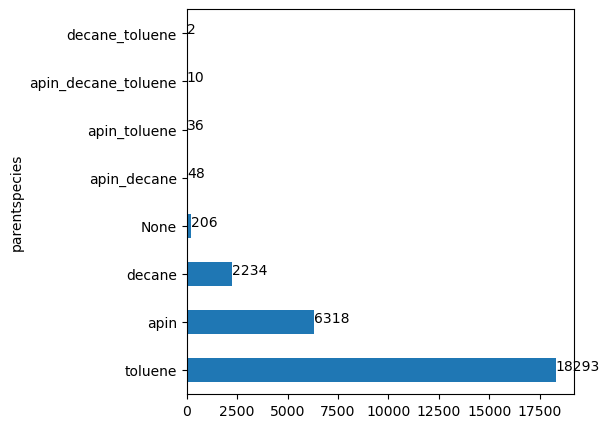

In [58]:
# Fill null values with 'None'
train['parentspecies'] = train['parentspecies'].fillna('None')
test['parentspecies'] = test['parentspecies'].fillna('None')

counts = train['parentspecies'].value_counts()
counts.plot(kind='barh', figsize=(5, 5))

for index, value in enumerate(counts):
    plt.text(value, index, str(value))

plt.show()

/home/topias/anaconda3/envs/ml-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/topias/anaconda3/envs/ml-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


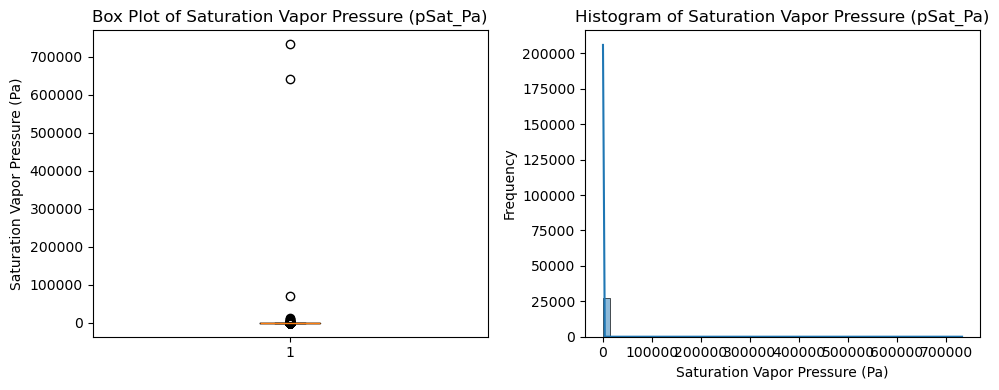

In [46]:
'''Let's look at some outliers'''

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(10, 4))

# First plot: Boxplot for pSat_Pa
plt.subplot(1, 2, 1)
plt.boxplot(train['pSat_Pa'])
plt.title('Box Plot of Saturation Vapor Pressure (pSat_Pa)')
plt.ylabel('Saturation Vapor Pressure (Pa)')

# Second plot: Histogram for pSat_Pa
plt.subplot(1, 2, 2)
sns.histplot(train['pSat_Pa'], bins=50, kde=True)
plt.title('Histogram of Saturation Vapor Pressure (pSat_Pa)')
plt.xlabel('Saturation Vapor Pressure (Pa)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


/home/topias/anaconda3/envs/ml-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/topias/anaconda3/envs/ml-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


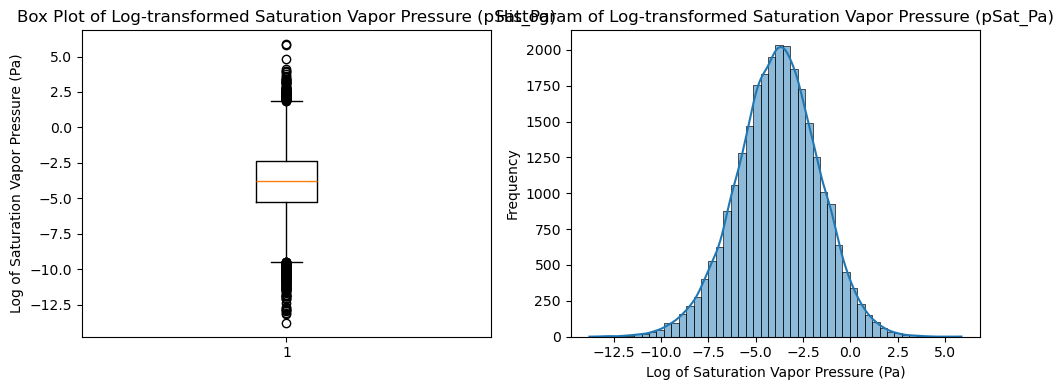

In [48]:
# Log-transforming pSat_Pa while handling zero and negative values
pSat_Pa_log = np.log10(train['pSat_Pa'].clip(lower=1e-15))

plt.figure(figsize=(10, 4))

# First plot: Boxplot for log-transformed pSat_Pa
plt.subplot(1, 2, 1)
plt.boxplot(pSat_Pa_log)
plt.title('Box Plot of Log-transformed Saturation Vapor Pressure (pSat_Pa)')
plt.ylabel('Log of Saturation Vapor Pressure (Pa)')

# Second plot: Histogram for log-transformed pSat_Pa
plt.subplot(1, 2, 2)
sns.histplot(pSat_Pa_log, bins=50, kde=True)
plt.title('Histogram of Log-transformed Saturation Vapor Pressure (pSat_Pa)')
plt.xlabel('Log of Saturation Vapor Pressure (Pa)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

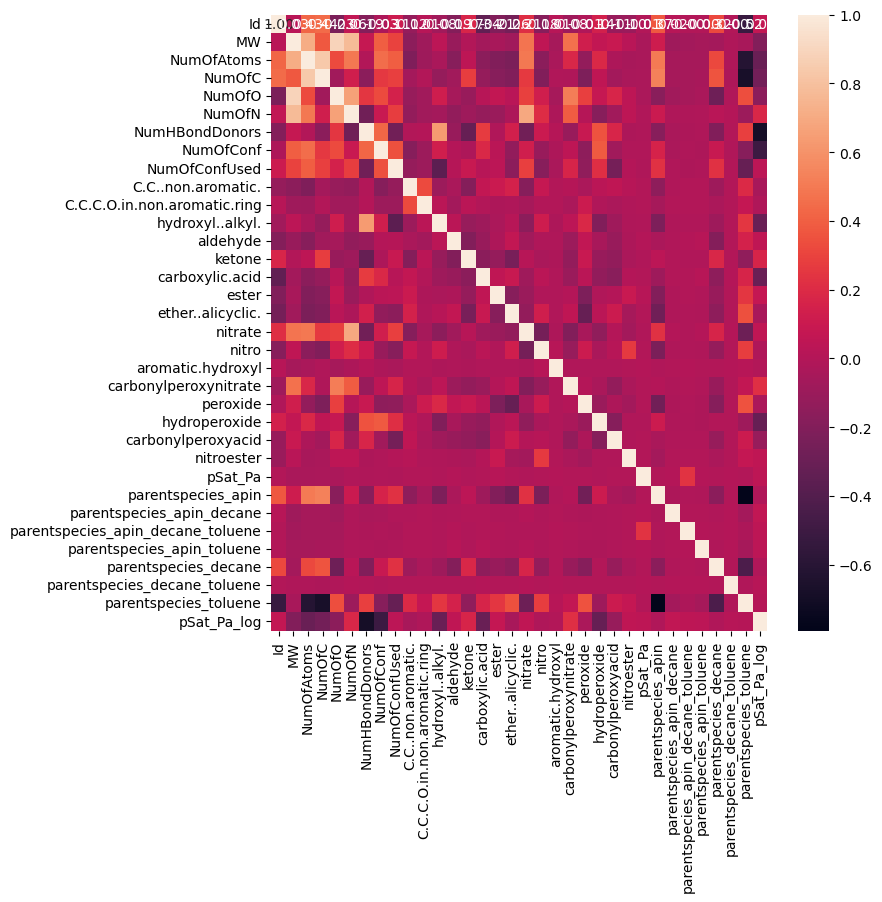

In [61]:
'''Create a correlation matrix'''

corr = train_encoded.corr()

# Generate a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


In [62]:
'''Encoding the categorical variables and taking the log of the target variable'''

# Encode the categorical column in the training data
train_encoded = pd.get_dummies(train, columns=['parentspecies'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['parentspecies'], drop_first=True)

# Add missing columns in the test set
for column in train_encoded.columns:
    if column not in test_encoded.columns and column != 'pSat_Pa':
        test_encoded[column] = 0


train_encoded['pSat_Pa_log'] = np.log10(train['pSat_Pa'])

In [63]:
''' Removing some outliers, let's see if this is necessary after all...'''
# Calculate Z-scores for the 'pSat_Pa' column
z_scores = zscore(train_encoded['pSat_Pa_log'])

# Identify outlier indices
outlier_indices = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the training data
train_outliers_removed = train_encoded[~outlier_indices]



In [66]:
'''Let's first do a simple linear regression to see what's what'''


# Separate features and target for training
X = train_encoded.drop(['Id','pSat_Pa','pSat_Pa_log'], axis=1)
y = train_encoded['pSat_Pa_log']

# Test data is already prepared in X_test
X_test = test_encoded

# Split since the test data doesn't have the target variables
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [67]:
y_pred

array([-2.63644657, -1.5055416 , -0.72259817, ..., -5.6726343 ,
       -2.73225013, -5.12110608])

In [68]:
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


R2 Score: 0.7094957076642562
Mean Squared Error: 1.3396608554531388


In [71]:

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print the R2 scores and their average
print("R2 scores for Random Forest:", rf_cv_scores)
print("Average R2 score for Random Forest:", np.mean(rf_cv_scores))

R2 scores for Random Forest: [0.70989924 0.70839553 0.71660764 0.70764318 0.70264474]
Average R2 score for Random Forest: 0.7090380652471906


In [72]:
# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

# Print the R2 scores and their average
print("R2 scores for Gradient Boosting:", gb_cv_scores)
print("Average R2 score for Gradient Boosting:", np.mean(gb_cv_scores))

R2 scores for Gradient Boosting: [0.72039381 0.71992308 0.72720603 0.72153419 0.71598261]
Average R2 score for Gradient Boosting: 0.7210079453831321
